Practical 7 PART A and B

>B-76

> Shivam Gupta


#<font> **PART(A)**

Aim: Suppose that the data mining task is to cluster points (with (x,y) representing location)
into three clusters. Consider the data points- A1(2,10), A2(2,5), A3(8,4), B1(5,8), B2(7,5),
B3(6,4), C1(1,2), C2(4,0). Use the Manhattan distance function. Initially, assume A1, B1, and
C1 as cluster centers. Implement the K-means algorithm to show the final three clusters.

In [ ]:
points=[[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,0]]

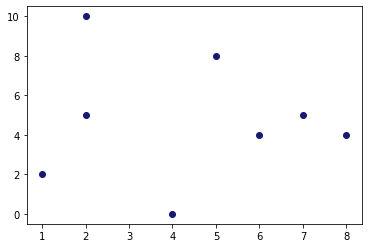

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
x = [2,2,8,5,7,6,1,4]
y = [10,5,4,8,5,4,2,0]
plt.scatter(x,y,color='midnightblue')
plt.show()

In [ ]:
c1=[2,10]
c2=[5,8]
c3=[1,2]
centroid=[c1,c2,c3]
centroid_name=['c1','c2','c3']
k=3
num=len(points)

In [ ]:
prev_centroid=[]

In [ ]:
while True:
  #calculate Manhattan Distance
  manhattan_dist={}
  for i in range(k):
    j=centroid[i]
    temp=[]
    for point in points:
      md=abs(point[0]-j[0])+abs(point[1]-j[1])
      temp.append(md)
    manhattan_dist[centroid_name[i]]=temp

  #Initialize Clusters
  cluster1=[]
  cluster2=[]
  cluster3=[]
  
  for i in range(num):
    m=min(manhattan_dist['c1'][i],manhattan_dist['c2'][i],manhattan_dist['c3'][i])
    print(manhattan_dist['c1'][i],manhattan_dist['c2'][i],manhattan_dist['c3'][i])
    if manhattan_dist['c1'][i]==m:
      cluster1.append(points[i])
    elif manhattan_dist['c2'][i]==m:
      cluster2.append(points[i])
    elif manhattan_dist['c3'][i]==m:
      cluster3.append(points[i])
  clusters=[cluster1,cluster2,cluster3]

  for i in range(3):
    centroid[i][0]=0
    centroid[i][1]=0

    for j in range(len(clusters[i])):
      centroid[i][0]+=clusters[i][j][0]
      centroid[i][1]+=clusters[i][j][1]

    centroid[i][0]=centroid[i][0]/len(clusters[i])
    centroid[i][1]=centroid[i][1]/len(clusters[i])
  if prev_centroid!=[]:
    if prev_centroid==centroid:
      break
  for i in centroid:
    prev_centroid.append(i)




In [ ]:
def plot(c):
  x=[]
  y=[]
  for i in c:
    x.append(i[0])
    y.append(i[1])
  return x,y

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
x,y=plot(cluster1)
plt.scatter(x,y,color="r")
x,y=plot(cluster2)
plt.scatter(x,y,color="b")
x,y=plot(cluster3)
plt.scatter(x,y,color="g")
plt.show()

#<font color="crimson"> **PART(B)**

1. <font color="black">Open and display the image “dog.jpeg”. Convert the image into NumPy array, so that it
can be used in further processing. [Hint: Use PIL module from python]
2. <font color="black">Find out the dimensions of the image and convert it into a two-dimensional array.
3. Use k means clustering with k set to 3 and cluster the image.
[Hint: Refer to k-means module of scikit learn]
4. Predict the cluster label of every pixel in the image and plot it back as an image.
5. Find out the three dominant color in the image.
[Hint: The cluster centers should correspond to three dominant colors]

In [ ]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

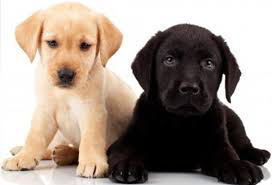

In [ ]:
with Image.open('dogs.jpeg') as original_image:
    display(original_image)

In [ ]:
pix = np.array(original_image)
pix.shape

(185, 272, 3)

In [ ]:
original_image = cv2.imread('dogs.jpeg')
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

In [ ]:
print("Original Dim:",img.shape)
print("2-D Conversion:",vectorized.shape)

Original Dim: (185, 272, 3)
2-D Conversion: (50320, 3)


In [ ]:
from sklearn.cluster import KMeans
K = 3
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(vectorized)

In [ ]:
X=vectorized
X

array([[240., 240., 240.],
       [255., 255., 255.],
       [255., 255., 255.],
       ...,
       [254., 254., 254.],
       [254., 254., 254.],
       [254., 254., 254.]], dtype=float32)

In [ ]:
center=km.cluster_centers_[:,:]
label=km.labels_[:]
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

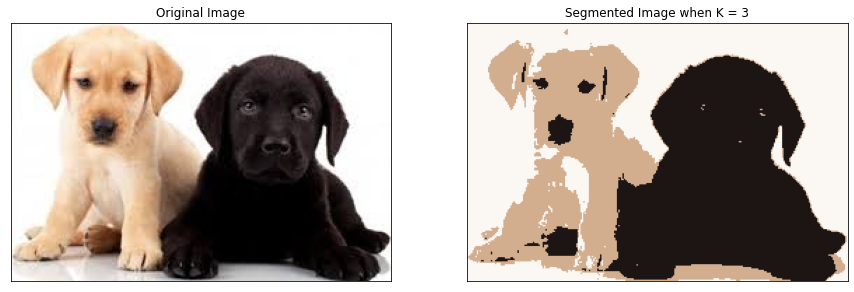

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

<font color="crimson">**Three dominant color in the image using the cluster centers:**

In [ ]:
print(center)

[[ 29  21  20]
 [251 247 243]
 [210 174 143]]
